# Visualizing Amounts

The most common way of visualizing amounts (i.e., quantities or magnitudes) is using bar plots. However, **not all bar plots are the same and sometimes other options (such as dot plots and heatmaps) may be a better choice**. Throughout the notebook, I'll make claims on best practices when using bar plots. In summary, I make the case that:
1. [Horizontal bars are better than vertical bars for long labels](#1.0-Horizontal-bars-are-better-than-vertical-bars-for-long-labels)
2. [Order bars by magnitude unless there is a "natural" ordering](#2.0-Order-bars-by-magnitude-unless-there-is-a-"natural"-ordering)
3. [Use Dot plots when using bars hinders you](#3.0-Use-Dot-plots-when-using-bars-hinders-you)

This notebook also includes examples of visualizing amounts in multidimensional scenarios. We'll look at:

4. Grouped Bars (two-dimensional)
5. Stacked Bars (two-dimensional)


In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import pandas as pd
import random
from itertools import product

## Data and Helper Functions

In [2]:
airlines_market = {
    'American': 18.3,
    'Alaska': 5.7,
    'JetBlue': 5.4,
    'United': 14.3,
    'Spirit': 4.7,
    'Southwest': 17.1,
    'Delta': 17.1,
    'SkyWest': 3.2,
    'Frontier': 3.2,
    'Hawaiian': 1.8,
    'Other': 9.19999999999999}

indices = list(airlines_market.keys())
market_amount = list(airlines_market.values())

def get_canvas(title = None, figsize = (6, 4), **kwargs):
    "Returns axes with title and y-label"
    fig, ax = plt.subplots(figsize = figsize, **kwargs)
    
    if not isinstance(ax, np.ndarray):
        if title is None:
            ax.set_title("Airline Domestic Market Share June 2021 - May 2022")
        else:
            ax.set_title(title)
        return ax
    
    for axis_i in ax:
        axis_i.set_ylabel('Market Share (%)')
    return ax

## 1.0 Horizontal bars are better than vertical bars for long labels

First, let's look at the simplest barplot obtained using ``ax.bar``. 

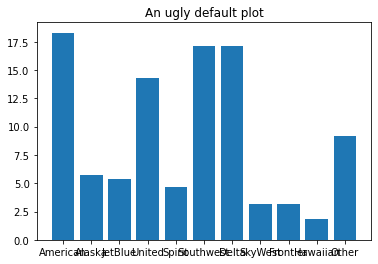

In [3]:
ax = get_canvas(title = 'An ugly default plot')
ax.bar(x = indices, height = market_amount)
plt.show()

The default plot leaves a lot to be desired. First, the category labels run into each other. To solve this problem, we can
1. Increase the size of the figure
2. Rotate the labels

**None of those options work in my opinion.**

### 1.1 Increasing the size of the figure

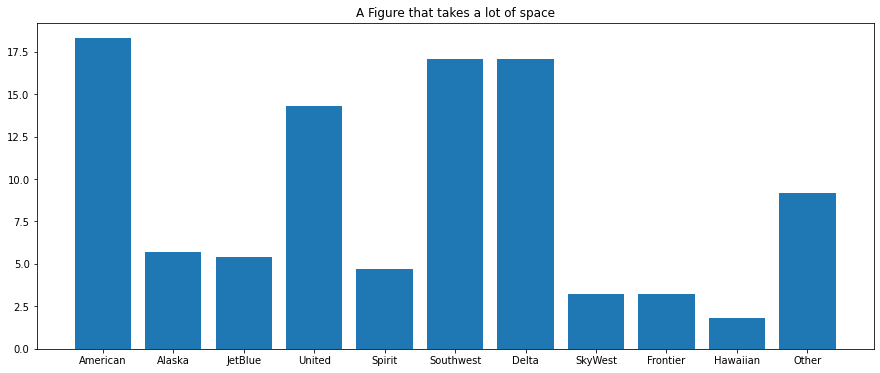

In [4]:
ax = get_canvas('A Figure that takes a lot of space', figsize=(15, 6))
ax.bar(x = indices, height = market_amount)
plt.show()

### 1.2 Rotating labels

I think rotating labels create lots of visual issues as there is text going in three different directions. (left figure) and turning the labels 90 degrees may hurt your neck!

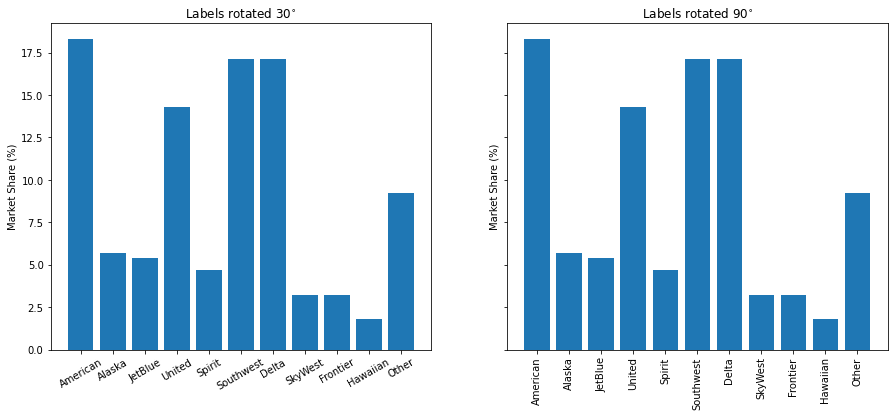

In [5]:
ax = get_canvas(nrows=1, ncols=2, sharey = True, title = "", figsize=(15, 6))
ax[0].bar(x = indices, height = market_amount, tick_label = indices)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30, ha='center')
ax[0].set_title(r'Labels rotated $30 ^{\circ} $')

ax[1].bar(x = indices, height = market_amount, tick_label = indices)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='center')
ax[1].set_title(r'Labels rotated $90 ^{\circ} $');

### 1.3 A better solution

The better solution for long labels is usually to swap the *X* and the *Y* axis, so that the bars run horizontally.  After swapping the axes, we obtain a compact figure in which all visual elements, including all text, are horizontally oriented. As a result, **the figure is much easier to read** than the options shown before.

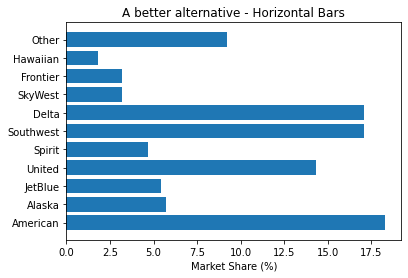

In [6]:
ax = get_canvas(title = "A better alternative - Horizontal Bars")
ax.barh(y = indices, width = market_amount)
ax.set_xlabel('Market Share (%)')
plt.show()

## 2.0 Order bars by magnitude unless there is a "natural" ordering

The order in which bars are arranged should be meaningful to the context. Sometimes, plotting libraries arranged the bars by alphabetical order of the labels.

*Bars should be arranged in order of their magnitude unless there is a natural or inherent ordering, such as time or age.*

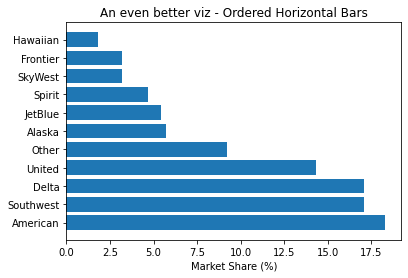

In [7]:
ax = get_canvas(title = "An even better viz - Ordered Horizontal Bars")

# Merge two lists into list of tuples, order by market share and split
labels_and_values = tuple(zip(indices, market_amount))
labels_and_values = sorted(labels_and_values, key = lambda x: x[1], reverse = True)
labels_and_values = list(zip(*labels_and_values))

# Plotting
ax.barh(y = labels_and_values[0], width = labels_and_values[1])
ax.set_xlabel('Market Share (%)')
plt.show()

### 2.1 Horizontal bars ordered "naturally"

Looking at the number of fighters in each UFC weight category, it makes sense to order the bars with respect to weight and not the number of fighters.

In [8]:
df = pd.read_csv('ufc_master_data.csv')
grp = df.groupby(['gender', 'weight'])
df_grp = grp.size()['Male']

Text(0.5, 0.98, 'Number of UCF Male Fighters per Weight Division')

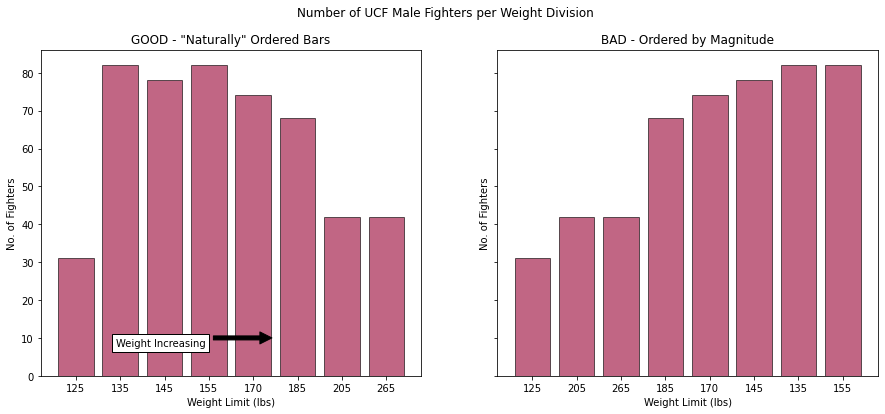

In [9]:
kwargs = dict(color = '#990033', edgecolor = 'black', alpha = 0.6 )
ax = get_canvas(nrows=1, ncols=2, sharey = True, title = "", figsize=(15, 6))

# Bars in increasing weight order (natural)
ax[0].bar(x = range(len(df_grp)), 
          height = df_grp.values, 
          tick_label = df_grp.index, **kwargs)
ax[0].set_title(r'GOOD - "Naturally" Ordered Bars')
ax[0].set_xlabel('Weight Limit (lbs)')
ax[0].set_ylabel('No. of Fighters')

# Adding Label
ax[0].annotate('Weight Increasing', xy=(4.5, 10), xycoords='data',
            xytext=(-70, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox=dict(fc="white"),
            horizontalalignment='right', verticalalignment='top')

# Bars arranged in order of the numbers of fighters
idx_sorted = np.argsort(df_grp.values)

ax[1].bar(x = range(len(df_grp)), 
          height = df_grp.values[idx_sorted], 
          tick_label = df_grp.index[idx_sorted], **kwargs)
ax[1].set_title('BAD - Ordered by Magnitude')
ax[1].set_xlabel('Weight Limit (lbs)')
ax[1].set_ylabel('No. of Fighters');
plt.suptitle('Number of UCF Male Fighters per Weight Division')

## 3.0 Use Dot plots when using bars hinders you

One important limitation of bars is that they need to start at zero so that the bar length is proportional to the amount shown.

For some datasets, this can:
 - be impractical (i.e., datasets far away from zero)
 - obscure key features
 
If the amount's range has a different start point like in the example below, this can **be misleading as the bar lengths do not accurately represent the data values.**

Read Life Expectancy Data

In [10]:
life_exp = pd.read_csv('gapminder.csv', index_col = 0)
life_exp = life_exp[life_exp['continent'] == 'Americas']
life_exp.reset_index(drop = True, inplace = True)

# Extract Data for plot
life_exp_years = life_exp['life_exp'].values
countries = life_exp['country'].values
idx_sorted = np.argsort(life_exp_years)

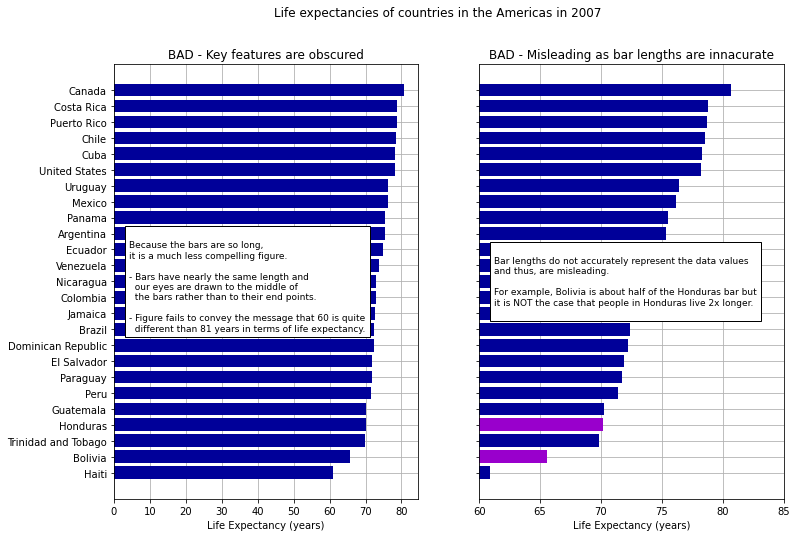

In [11]:
fig, ax = plt.subplots(ncols = 2, figsize = (12, 8), sharey = True)
for ax_i in ax:
    ax_i.grid()
    ax_i.set_axisbelow(True)
    ax_i.set_xlabel('Life Expectancy (years)')
    ax_i
    
ax[0].barh(y = countries[idx_sorted], width = life_exp_years[idx_sorted], color = '#000099')
ax[0].set_title('BAD - Key features are obscured')


ax[1].barh(y = countries[idx_sorted], width = life_exp_years[idx_sorted],
           color = np.where(np.isin(countries[idx_sorted], ['Bolivia', 'Honduras']), '#9900CC', '#000099') )
ax[1].set_title('BAD - Misleading as bar lengths are innacurate')
ax[1].set_xlim(60, 85)

# ADDING TEXT ANNOTATIONS
props=dict(facecolor='white',alpha=1)
fig_1_text = """
Because the bars are so long, \nit is a much less compelling figure.\n
- Bars have nearly the same length and\n  our eyes are drawn to the middle of
  the bars rather than to their end points.\n
- Figure fails to convey the message that 60 is quite
  different than 81 years in terms of life expectancy."""
ax[0].text(0.05, 0.5, fig_1_text, transform=ax[0].transAxes, fontsize=9,
        verticalalignment='center', horizontalalignment='left', bbox=props)

fig_2_text = """
Bar lengths do not accurately represent the data values
and thus, are misleading. 

For example, Bolivia is about half of the Honduras bar but
it is NOT the case that people in Honduras live 2x longer.
"""
ax[1].text(0.05, 0.5, fig_2_text, transform=ax[1].transAxes, fontsize=9,
        verticalalignment='center', horizontalalignment='left', bbox=props)

plt.suptitle('Life expectancies of countries in the Americas in 2007')
plt.show()

### 3.1 A better solution

By limiting the axis range to the interval from 60 to 81 years, the figure highlights the key features of this dataset: 
- Canada has the highest life expectancy among all listed countries; and
- Bolivia and Haiti have much lower life expectancies than all other countries. 

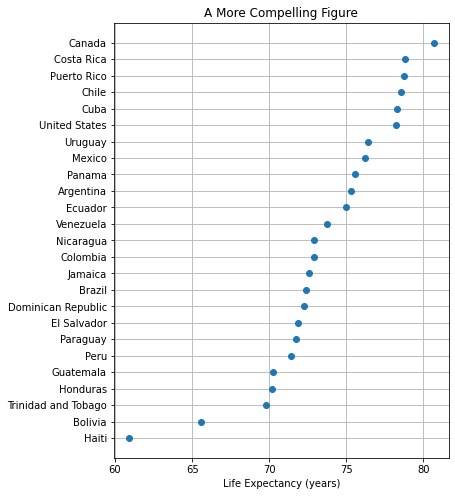

In [12]:
fig, ax = plt.subplots(figsize = (6,8))
ax.scatter(x = life_exp_years[idx_sorted], y = countries[idx_sorted])
ax.grid() ; ax.set_axisbelow(True)
ax.set_xlabel('Life Expectancy (years)')
ax.set_xticks(ticks = np.arange(60, 82, 5))
ax.set_title('A More Compelling Figure');

## 4.0 Grouped Bars

Grouped bars can be used for higher-dimensional datasets. **It is very important to underscore that different orderings can highlight different aspects of the data.**

In the next example, we'll see the same data but interchanging the x-axis and color mappings. 

### 4.1 Read CrossFit Data

In [13]:
# Read Crossfit Data and extract the rows corresponding to the 5 countries with the most athletes
df = pd.read_csv('2020_opens_athletes.csv', low_memory=False)
grp = df.groupby('countryoforiginname') 
df_size = grp.size().sort_values(ascending = False)[1:6]
filt = (df['countryoforiginname'].isin(df_size.index)) & (df['gender'] == 'M')

# Get counts by gender and country
grp = df.loc[filt].groupby(['countryoforiginname', 'division']) 
df_grp = grp.size()

# Get Categorical Variables
countries = list(df_grp.index.get_level_values(0).unique())
age_groups = list(df_grp.index.get_level_values(1).unique())
age_groups.remove('Men') # Remove Open Category

### 4.2 Nationality mapped to X-axis and Age mapped to color

Emphasis is within nationality groups, and thus we can look at patterns within each country across different age-groups. 
- All countries have the most number of athletes in the 35-39 age-group

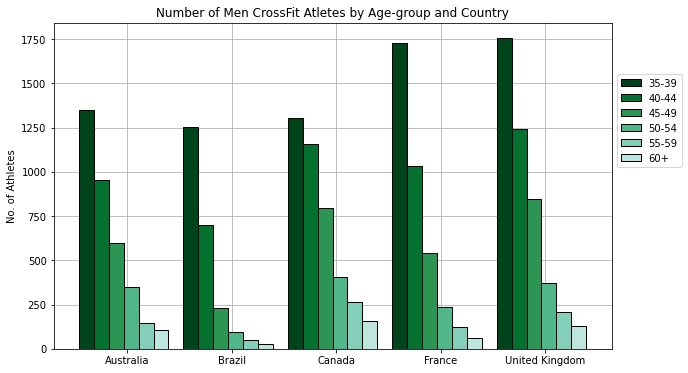

In [14]:
bar_width = 0.5
fig, ax = plt.subplots(figsize = (10, 6))

# Offset to position bars for each country
offset = np.arange(-bar_width*2.75, bar_width*2.75, bar_width)

# Get discrete colors from colormap
colors = plt.get_cmap('BuGn')(np.linspace(0,1, num = 8))[::-1]

# Position along x-axis
x = np.arange(1, 16, 3.5)
for age, offset_i, cl_i in zip(age_groups, offset, colors):
    
    # Get indexes [(Australia, Men (35-39), (Brazil, Men (35-39))
    indices = list(product(countries, [age])) # All countries for that age
 
    yArr = df_grp.loc[indices].values
    position = x + offset_i
    ax.bar(position, yArr, width = bar_width, label = age.replace("Men (", "").replace(")", ""),
           edgecolor='black', facecolor = cl_i)
    
# Graph Aesthetics
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.7));
ax.grid()   
ax.set_axisbelow(True)    
ax.set_ylabel('No. of Athletes')
ax.set_title('Number of Men CrossFit Atletes by Age-group and Country')
plt.show()

### 4.3 Age mapped to X-axis and Age Nationality to color

Emphasis is now on differences within countries for each age group. 
- We notice that Canada has the largest number of athletes in 50-54, 55-59, and 60+ age groups which is not emphasized in the figure above.

**Choices (or very subtle differences) that may seem very innocent at the time of figure creation can have a big impact on how a figure is perceived**

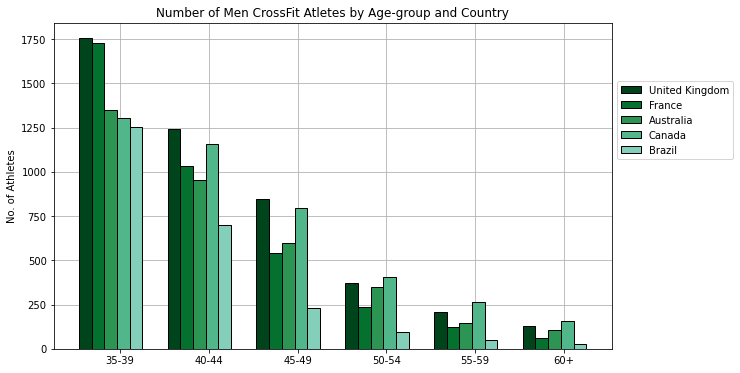

In [15]:
bar_width = 0.5
fig, ax = plt.subplots(figsize = (10, 6))

# Offset to position bars for each country
offset = np.arange(-bar_width*2.75, bar_width*2.75, bar_width)

# Get discrete colors from colormap
colors = plt.get_cmap('BuGn')(np.linspace(0,1, num = 8))[::-1]
col_dict = {country:color for country, color in zip(countries, colors)}

# Position along x-axis
x = np.arange(1, 19, 3.5)

# Order countries by count 35-39
countries = ['United Kingdom', 'France','Australia', 'Canada','Brazil']
for country, offset_i, cl_i in zip(countries, offset, colors):
    
    # Get indexes [(Australia, Men (35-39), (Australia, Men (40-44))
    indices = list(product([country], age_groups)) # All countries for that age
    yArr = df_grp.loc[indices].values
    position = x + offset_i
    ax.bar(position, yArr, width = bar_width, label = country,
           edgecolor='black', facecolor = cl_i)

    
ax.set_xticks(x)
ax.set_xticklabels([name.replace("Men (", "").replace(")", "") for name in age_groups])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.7));
ax.grid()   
ax.set_axisbelow(True)    
ax.set_ylabel('No. of Athletes')
ax.set_title('Number of Men CrossFit Atletes by Age-group and Country')
plt.show()

## 5.0 Vertical Stacked Bars 

Sometimes we may want to stack bars on top of each other. Vertically stacking is considered good practice only when the sum of the amounts represented by the individual stacked bars is in itself a meaningful amount.

In this example, we'll look at CrossFit athletes' composition (male vs. female) for age divisions (not including the Open category). Thus, we have two categorical variables **age** and **gender**.
The combined bars represent the total number of athletes in each age group which, by itself, is a meaningful amount.

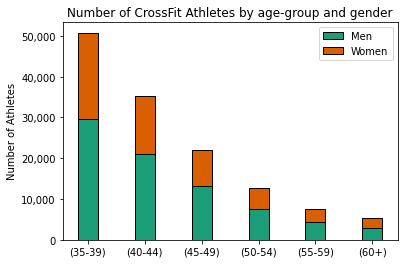

In [16]:
df = pd.read_csv('2020_opens_athletes.csv', low_memory=False)
grp = df.groupby('division') 
df_grp = grp.size()
df_grp.rename(index = {'Men': 'Open_M', 'Women': 'Open_W'}, inplace = True)

mens_col = [col for col in df_grp.index if 'Men' in col]
women_col = [col for col in df_grp.index if 'Women' in col]

# Same categories for men and women so get labels
labels = [col.replace('Men ', "") for col in mens_col]

# Plotting
fig, ax = plt.subplots()
width = 0.35
colors = plt.get_cmap('Dark2').colors
ax.bar(labels, df_grp[mens_col], width, label='Men', edgecolor = 'black', facecolor = colors[0])
ax.bar(labels, df_grp[women_col], width, bottom=df_grp[mens_col],
       label='Women', edgecolor = 'black', facecolor = colors[1])

# Graph Aesthetics
ax.set_ylabel('Number of Athletes')
ax.set_title('Number of CrossFit Athletes by age-group and gender')
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend();

### A good complimentary Graph

If our focus is on the composition of athletes by age and gender, a scaled version of the data shown above might be better.
Here the message is much more straightforward:

**About 55-60% of CrossFit athletes across all age groups are males**.

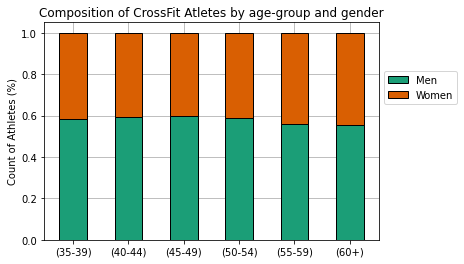

In [17]:
# Plotting
fig, ax = plt.subplots()
width = 0.5
colors = plt.get_cmap('Dark2').colors

# Scale data to 100%
men = df_grp[mens_col].reset_index(drop = True)
women = df_grp[women_col].reset_index(drop = True)

men_pct = ax.bar(labels, men / (men+women), width, label='Men', edgecolor = 'black', facecolor = colors[0])
ax.bar(labels, women/ (men+women), width, bottom= men / (men+women),
       label='Women', edgecolor = 'black', facecolor = colors[1])

# Graph Aesthetics
ax.set_ylabel('Count of Athletes (%)')
ax.set_title('Composition of CrossFit Atletes by age-group and gender')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.7));
ax.grid()
ax.set_axisbelow(True)